# Handwriting OCR API example

### This Jupyter notebook shows you how to get started with the Cognitive Service <b>Computer Vision Handwriting OCR API</b> in Python, and how to visualize your results.

To use this notebook, you will need to get keys to <b>Computer Vision API</b>. Visit <a href="https://www.microsoft.com/cognitive-services/en-us/computer-vision-api">https://www.microsoft.com/cognitive-services/en-us/computer-vision-api</a>, and then the “Try for free” button. On the “Sign in” page, use your Microsoft account to sign in and you will be able to subscribe to Computer Vision API and get free keys (Code of Conduct and TOS). After completing the sign-up process, paste your key into the variables section below. (Either the primary or the secondary key works.)

In [1]:
import time 
import requests
import cv2
import operator
import numpy as np

# Import library to display results
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline 
# Display images within Jupyter

In [2]:
# Variables
# Make sure Key + Region - westeuripe here are correct
_url = 'https://westeurope.api.cognitive.microsoft.com/vision/v1.0/RecognizeText'
_key = 'YOUR KEY'
_maxNumRetries = 10
_path2Images = r'..\handwriting\\'

# Helper functions
here we create some helper fuctions to send the request,

In [3]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request 

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:
        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429:
            print( "Message: %s" % ( response.json() ) )
            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break
        elif response.status_code == 202:
            result = response.headers['Operation-Location']
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json() ) )
        break
        
    return result

In [4]:
def getOCRTextResult( operationLocation, headers ):
    """
    Helper function to get text result from operation location

    Parameters:
    operationLocation: operationLocation to get text result, See API Documentation
    headers: Used to pass the key information
    """

    retries = 0
    result = None

    while True:
        response = requests.request('get', operationLocation, json=None, data=None, headers=headers, params=None)
        if response.status_code == 429:
            print("Message: %s" % (response.json()))
            if retries <= _maxNumRetries:
                time.sleep(1)
                retries += 1
                continue
            else:
                print('Error: failed after retrying!')
                break
        elif response.status_code == 200:
            result = response.json()
        else:
            print("Error code: %d" % (response.status_code))
            print("Message: %s" % (response.json()))
        break

    return result

In [5]:
def showResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    img = img[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(img, aspect='equal')

    lines = result['recognitionResult']['lines']

    for i in range(len(lines)):
        words = lines[i]['words']
        for j in range(len(words)):
            tl = (words[j]['boundingBox'][0], words[j]['boundingBox'][1])
            tr = (words[j]['boundingBox'][2], words[j]['boundingBox'][3])
            br = (words[j]['boundingBox'][4], words[j]['boundingBox'][5])
            bl = (words[j]['boundingBox'][6], words[j]['boundingBox'][7])
            text = words[j]['text']
            x = [tl[0], tr[0], tr[0], br[0], br[0], bl[0], bl[0], tl[0]]
            y = [tl[1], tr[1], tr[1], br[1], br[1], bl[1], bl[1], tl[1]]
            line = Line2D(x, y, linewidth=3.5, color='red')
            ax.add_line(line)
            ax.text(tl[0], tl[1] - 2, '{:s}'.format(text),
            bbox=dict(facecolor='blue', alpha=0.5),
            fontsize=14, color='white')

    plt.axis('off')
    plt.tight_layout()
    plt.draw()
    plt.show()

# Analysis of an image stored on disk

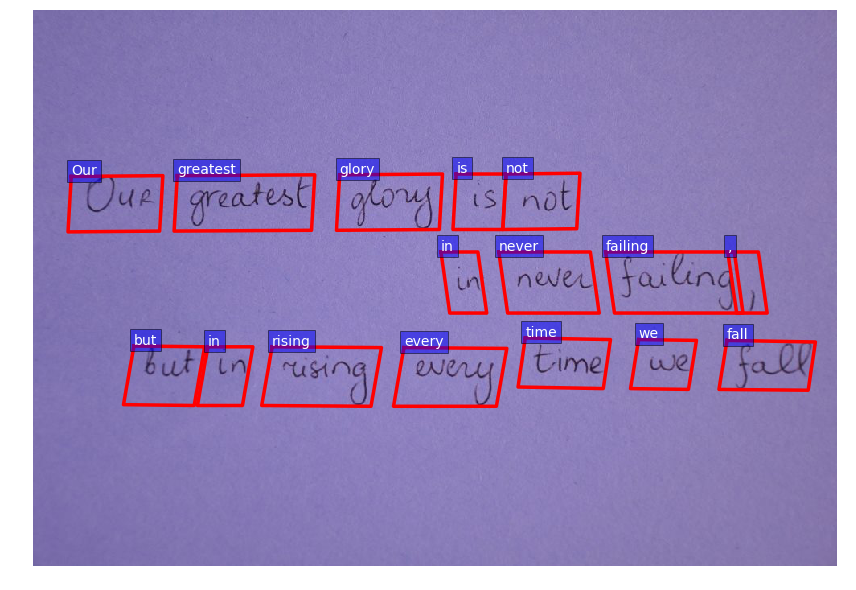

In [6]:
# Load raw image file into memory
pathToFileInDisk = _path2Images + 'hw_en.jpg'
with open(pathToFileInDisk, 'rb') as f:
    data = f.read()

# Computer Vision parameters
#params = {'language': 'xxx', 'handwriting' : 'true',}
params = {
    # Request parameters
    'handwriting' : 'true',
    'language': 'en',
    'detectOrientation ': 'true',
}

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None

operationLocation = processRequest(json, data, headers, params)

result = None
if (operationLocation != None):
    headers = {}
    headers['Ocp-Apim-Subscription-Key'] = _key
    while True:
        time.sleep(1)
        result = getOCRTextResult(operationLocation, headers)
        if result['status'] == 'Succeeded' or result['status'] == 'Failed':
            break

# Load the original image, fetched from the URL
if result is not None and result['status'] == 'Succeeded':
    data8uint = np.fromstring(data, np.uint8)  # Convert string to an unsigned int array
    img = cv2.cvtColor(cv2.imdecode(data8uint, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    showResultOnImage(result, img)

In [7]:
for j in result['recognitionResult']['lines']:
    print(j['text'])

Our greatest glory is not
in never failing ,
but in rising every
time we fall


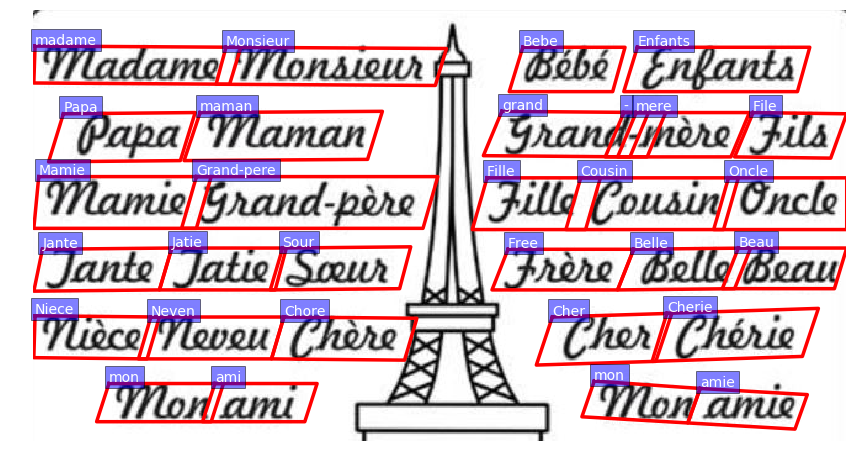

In [8]:
# Load raw image file into memory
pathToFileInDisk = _path2Images + 'hw_fr.jpg'
with open(pathToFileInDisk, 'r+b') as f:
    data = f.read()

# Computer Vision parameters
#params = {'language': 'xxx', 'handwriting' : 'true',}
params = {
    # Request parameters
    'handwriting' : 'true',
    'language': 'tr',
    'detectOrientation ': 'true',
}

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None

operationLocation = processRequest(json, data, headers, params)

result = None
if (operationLocation != None):
    headers = {}
    headers['Ocp-Apim-Subscription-Key'] = _key
    while True:
        time.sleep(1)
        result = getOCRTextResult(operationLocation, headers)
        if result['status'] == 'Succeeded' or result['status'] == 'Failed':
            break

# Load the original image, fetched from the URL
if result is not None and result['status'] == 'Succeeded':
    data8uint = np.fromstring(data, np.uint8)  # Convert string to an unsigned int array
    img = cv2.cvtColor(cv2.imdecode(data8uint, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    showResultOnImage(result, img)

In [9]:
for j in result['recognitionResult']['lines']:
    print(j['text'])

madame Monsieur
Bebe Enfants
Papa maman
grand - mere File
Mamie Grand-pere Fille Cousin Oncle
Jante Jatie Sour
Free Belle Beau
Niece Neven Chore
Cher Cherie
mon ami
mon amie


Try  processing your own handwriting,write on a  piece of paper, take a photo and put it on the '..\handwriting\\' folder. Then copy above two cells of code, change the file name and extension (i.e. be carefull whether your photo is a jpg or jpeg),
change the language if you are using another language, which is in the [list current 28 languages](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fc) supported by the Computer Vision API OCR service.